In [71]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('distance2.csv')
df = df.set_index('Date')

In [73]:
df = df.reset_index()
df

,Date,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2019/01/01,724994918,702847527,324233561,389008778,350710314,121295097,47059366,22576469,5417984,5184257
1,2019/01/02,873821053,857652193,414113344,514907497,502234086,168445426,53216858,23450868,5886809,4593584
2,2019/01/03,889115519,870213253,422309998,527320887,516078313,172895628,55099166,24373344,6114206,4701143
3,2019/01/04,879469995,886920417,435751001,543968920,528429562,176283264,57946617,26061661,6288101,4707485
4,2019/01/05,886366822,912494498,445616683,542819222,495714599,164524542,58090842,25471995,5973364,4315916
...,...,...,...,...,...,...,...,...,...,...,...
1127,2022/02/01,1119223826,939473978,460194936,590028553,549281847,170681588,55056147,22497410,4686881,3391335
1128,2022/02/02,1122807022,949053379,466278216,591583425,545284774,169499111,55329209,23411731,4892722,3512076
1129,2022/02/03,1120844037,928232447,446740232,567713099,529348171,165225036,54833879,23983083,5086418,3644006
1130,2022/02/04,1066314529,914735343,453801091,581405460,538878504,168233431,58648879,27416062,5308393,3401470


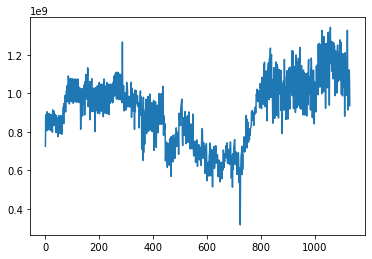

In [74]:

x = df[["Number of Trips <1"]]
plt.ion()
plt.plot(x)
plt.plot(x_filtered)
plt.show()

In [75]:
x_filtered

,0,1,2,3,4,5,6,7,8,9,...,1127,1128,1129,1130,1131,Number of Trips 1-5,Number of Trips 25-100,Number of Trips 5-25,Number of Trips <1,Number of Trips >=100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df['Number of Trips 1-5'] = df['Number of Trips 1-3'] + df['Number of Trips 3-5']
df['Number of Trips 5-25'] = df['Number of Trips 5-10'] + df['Number of Trips 10-25']
df['Number of Trips 25-100'] = df['Number of Trips 50-100'] + df['Number of Trips 25-50']
df['Number of Trips >=100'] = df['Number of Trips >=500'] + df['Number of Trips 250-500'] + df['Number of Trips 100-250']
df = df[['Date','Number of Trips <1', 'Number of Trips 1-5', 'Number of Trips 5-25', 'Number of Trips 25-100','Number of Trips >=100']]
df

,Date,Number of Trips <1,Number of Trips 1-5,Number of Trips 5-25,Number of Trips 25-100,Number of Trips >=100
0,2019/01/01,724994918,1027081088,739719092,168354463,33178710
1,2019/01/02,873821053,1271765537,1017141583,221662284,33931261
2,2019/01/03,889115519,1292523251,1043399200,227994794,35188693
3,2019/01/04,879469995,1322671418,1072398482,234229881,37057247
4,2019/01/05,886366822,1358111181,1038533821,222615384,35761275
...,...,...,...,...,...,...
1127,2022/02/01,1119223826,1399668914,1139310400,225737735,30575626
1128,2022/02/02,1122807022,1415331595,1136868199,224828320,31816529
1129,2022/02/03,1120844037,1374972679,1097061270,220058915,32713507
1130,2022/02/04,1066314529,1368536434,1120283964,226882310,36125925


In [79]:
x_filtered = df[['Number of Trips <1', 'Number of Trips 1-5', 'Number of Trips 5-25', 'Number of Trips 25-100','Number of Trips >=100']].apply(savgol_filter,  window_length=101, polyorder=2)

x_filtered 


,Number of Trips <1,Number of Trips 1-5,Number of Trips 5-25,Number of Trips 25-100,Number of Trips >=100
0,8.890461e+08,1.313698e+09,1.021915e+09,2.187944e+08,3.329333e+07
1,8.865990e+08,1.309618e+09,1.019083e+09,2.184680e+08,3.338698e+07
2,8.842405e+08,1.305707e+09,1.016387e+09,2.181628e+08,3.347931e+07
3,8.819707e+08,1.301962e+09,1.013829e+09,2.178788e+08,3.357031e+07
4,8.797896e+08,1.298386e+09,1.011408e+09,2.176161e+08,3.365998e+07
...,...,...,...,...,...
1127,1.077243e+09,1.354842e+09,1.089169e+09,2.198187e+08,3.307828e+07
1128,1.074609e+09,1.352548e+09,1.087710e+09,2.195418e+08,3.299165e+07
1129,1.071944e+09,1.350225e+09,1.086223e+09,2.192626e+08,3.290395e+07
1130,1.069247e+09,1.347871e+09,1.084709e+09,2.189811e+08,3.281519e+07


In [80]:
x_filtered['Date'] = df['Date']

In [82]:
compression_opts = dict(method='zip',
                        archive_name='distance_out.csv')  
x_filtered.to_csv('out.zip', index=False,
          compression=compression_opts) 

In [81]:
x_filtered

,Number of Trips <1,Number of Trips 1-5,Number of Trips 5-25,Number of Trips 25-100,Number of Trips >=100,Date
0,8.890461e+08,1.313698e+09,1.021915e+09,2.187944e+08,3.329333e+07,2019/01/01
1,8.865990e+08,1.309618e+09,1.019083e+09,2.184680e+08,3.338698e+07,2019/01/02
2,8.842405e+08,1.305707e+09,1.016387e+09,2.181628e+08,3.347931e+07,2019/01/03
3,8.819707e+08,1.301962e+09,1.013829e+09,2.178788e+08,3.357031e+07,2019/01/04
4,8.797896e+08,1.298386e+09,1.011408e+09,2.176161e+08,3.365998e+07,2019/01/05
...,...,...,...,...,...,...
1127,1.077243e+09,1.354842e+09,1.089169e+09,2.198187e+08,3.307828e+07,2022/02/01
1128,1.074609e+09,1.352548e+09,1.087710e+09,2.195418e+08,3.299165e+07,2022/02/02
1129,1.071944e+09,1.350225e+09,1.086223e+09,2.192626e+08,3.290395e+07,2022/02/03
1130,1.069247e+09,1.347871e+09,1.084709e+09,2.189811e+08,3.281519e+07,2022/02/04
